In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import shap
from catboost import *

In [15]:
tdf = pd.read_csv('train_a.csv')
x_test = pd.read_csv('test_a.csv')

In [3]:
tdf.head(3)

,LINE,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_12,X_13,...,X_925,X_926,X_927,X_928,X_929,X_930,X_931,X_932,X_933,Y_Quality
0,0,2.0,102.0,11.0,45.0,10.0,31.0,514.4,522.1,505.8,...,162.8,157.235484,150.9,326.0,309.290909,290.0,13.7,13.443333,13.2,0.517719
1,0,2.0,102.0,11.0,45.0,10.0,31.0,514.6,522.6,506.0,...,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.000000,-1.0,0.519090
2,0,2.0,97.0,11.0,45.0,10.0,31.0,517.4,526.0,508.9,...,157.1,154.074194,150.9,327.0,310.854546,298.0,13.7,13.454839,13.2,0.529362


In [16]:
x_train = tdf.drop(['Y_Quality'],axis = 1)
y_train = tdf['Y_Quality']

In [8]:
model = CatBoostRegressor(random_state=1234,
                          verbose=500,
                          iterations=1500,
                          learning_rate=0.033)

In [17]:
cb_model = model.fit(x_train,y_train)

0:	learn: 0.0098329	total: 19.5ms	remaining: 29.2s
500:	learn: 0.0006581	total: 7.27s	remaining: 14.5s
1000:	learn: 0.0000632	total: 14.6s	remaining: 7.26s
1499:	learn: 0.0000061	total: 21.8s	remaining: 0us


In [18]:
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(x_test)

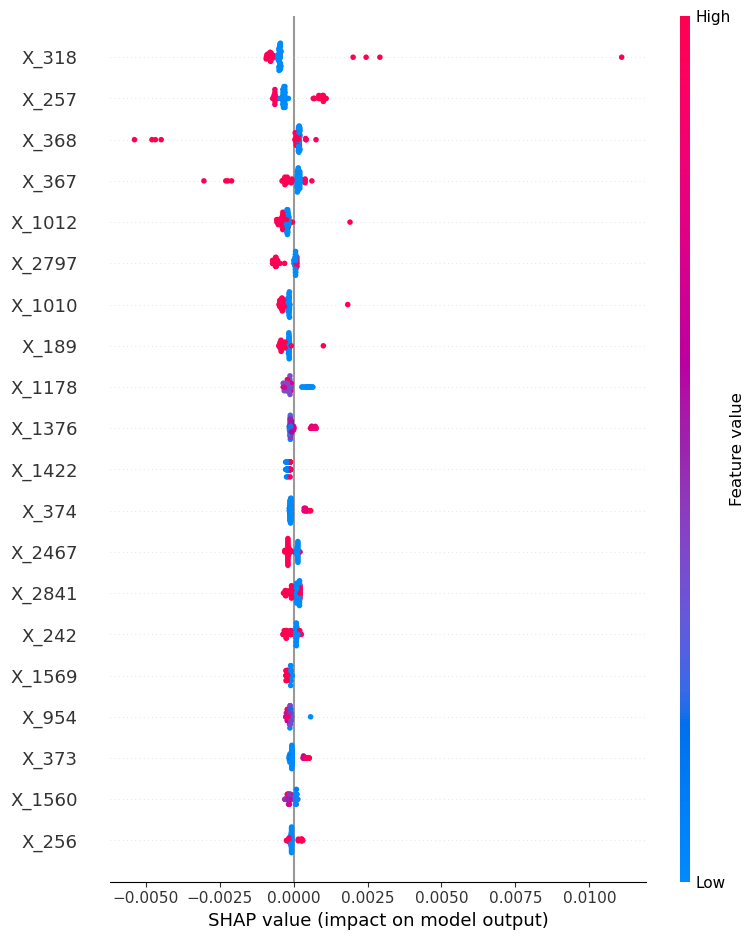

In [19]:
shap.summary_plot(shap_values, x_test)

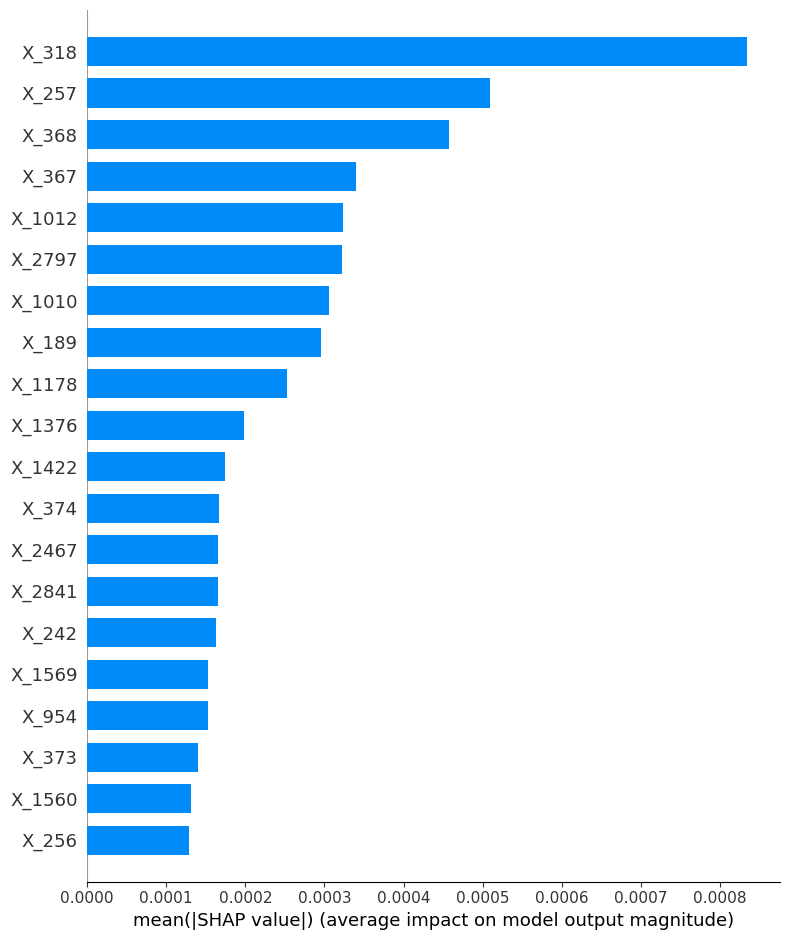

In [20]:
shap.summary_plot(shap_values, x_test, plot_type='bar')

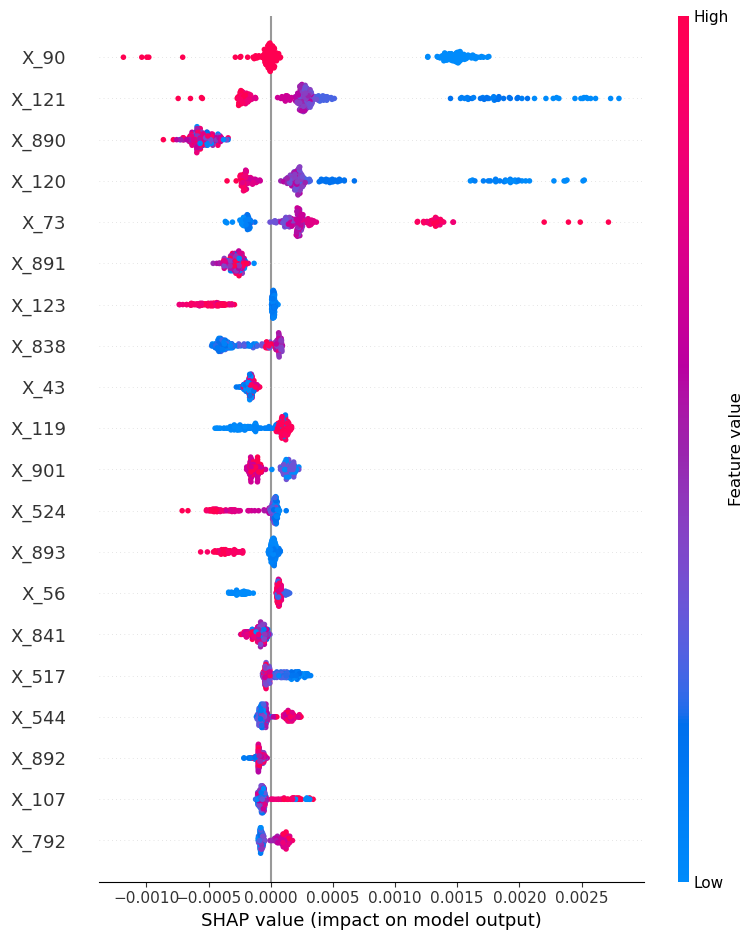

In [13]:
shap.summary_plot(shap_values, x_test)

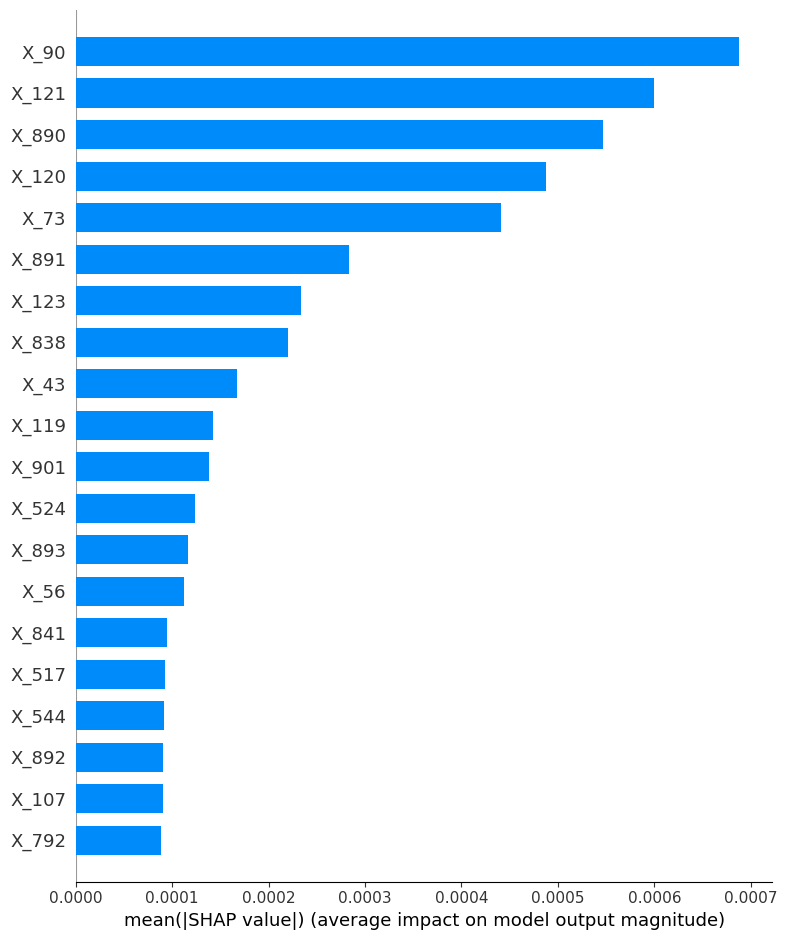

In [14]:
shap.summary_plot(shap_values, x_test, plot_type='bar')